In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import boxcox

In [ ]:
salary=pd.read_csv("/content/Salary_Data (1).csv")

In [ ]:
salary.shape

(30, 2)

In [ ]:
salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
salary.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [ ]:
salary[salary.duplicated()]

,YearsExperience,Salary


# EDA

{'boxes': [<matplotlib.lines.Line2D at 0x7f29b489ef90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f29b4caeb10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f29b48562d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f29b4856450>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f29b489ecd0>,
  <matplotlib.lines.Line2D at 0x7f29b489e090>]}

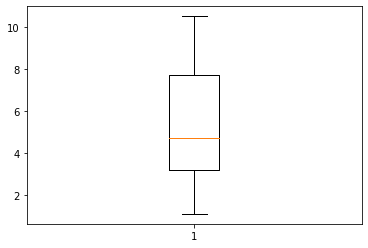

In [ ]:
plt.boxplot(salary['YearsExperience']) #no outliers

{'boxes': [<matplotlib.lines.Line2D at 0x7f29b4c1fd90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f29b4356910>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f29b434a190>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f29b432c590>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f29b4840890>,
  <matplotlib.lines.Line2D at 0x7f29b4356990>]}

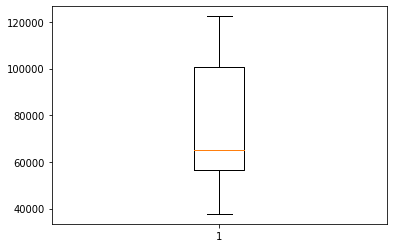

In [ ]:
plt.boxplot(salary['Salary']) #no outliers

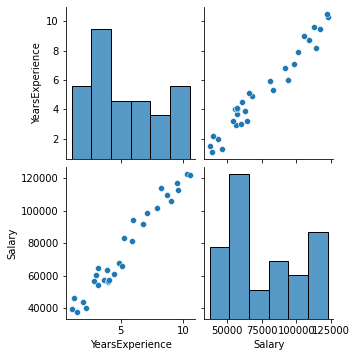

In [ ]:
import seaborn as sns
sns.pairplot(salary)

In [ ]:
salary.corr() #positive correlation of 0.97

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [ ]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [ ]:
array1=salary.values
scaler=MinMaxScaler(feature_range=(0,1))
rescaledX1=scaler.fit_transform(array1)
set_printoptions(precision=2)
print(rescaledX1[:,:])

[[0.   0.02]
 [0.02 0.1 ]
 [0.04 0.  ]
 [0.1  0.07]
 [0.12 0.03]
 [0.19 0.22]
 [0.2  0.26]
 [0.22 0.2 ]
 [0.22 0.32]
 [0.28 0.23]
 [0.3  0.3 ]
 [0.31 0.21]
 [0.31 0.23]
 [0.32 0.23]
 [0.36 0.28]
 [0.4  0.36]
 [0.43 0.33]
 [0.45 0.54]
 [0.51 0.52]
 [0.52 0.66]
 [0.61 0.64]
 [0.64 0.72]
 [0.72 0.75]
 [0.76 0.9 ]
 [0.81 0.85]
 [0.84 0.8 ]
 [0.89 0.94]
 [0.9  0.88]
 [0.98 1.  ]
 [1.   0.99]]


In [ ]:
rescaledXn=pd.DataFrame(rescaledX1,columns=['YearsExperience','Salary'])
print(rescaledXn)

    YearsExperience    Salary
0          0.000000  0.019041
1          0.021277  0.100094
2          0.042553  0.000000
3          0.095745  0.068438
4          0.117021  0.025514
5          0.191489  0.223376
6          0.202128  0.264812
7          0.223404  0.197425
8          0.223404  0.315545
9          0.276596  0.229837
10         0.297872  0.301051
11         0.308511  0.213359
12         0.308511  0.227097
13         0.319149  0.228561
14         0.361702  0.276163
15         0.404255  0.356804
16         0.425532  0.334255
17         0.446809  0.535755
18         0.510638  0.515379
19         0.521277  0.663938
20         0.606383  0.637928
21         0.638298  0.715119
22         0.723404  0.750898
23         0.755319  0.898665
24         0.808511  0.846917
25         0.840426  0.801453
26         0.893617  0.935956
27         0.904255  0.884763
28         0.978723  1.000000
29         1.000000  0.993870


# Simple regression on the original data

In [ ]:
import statsmodels.formula.api as smf
model11=smf.ols("salary['YearsExperience']~salary['Salary']",data=salary).fit()

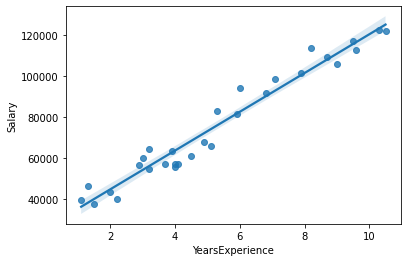

In [ ]:
sns.regplot(x='YearsExperience',y='Salary',data=salary)

In [ ]:
model11.params

Intercept          -2.383161
salary['Salary']    0.000101
dtype: float64

In [ ]:
model11.pvalues

Intercept           6.300123e-08
salary['Salary']    1.143068e-20
dtype: float64

In [ ]:
model11.rsquared

0.9569566641435086

# Log transformation

In [ ]:
salary_log=np.log(salary)

In [ ]:
model11_log=smf.ols("salary_log['YearsExperience']~salary_log['Salary']",data=salary_log).fit()

In [ ]:
model11_log.pvalues

Intercept               6.781355e-15
salary_log['Salary']    7.395278e-16
dtype: float64

In [ ]:
model11_log.rsquared

0.9052150725817153

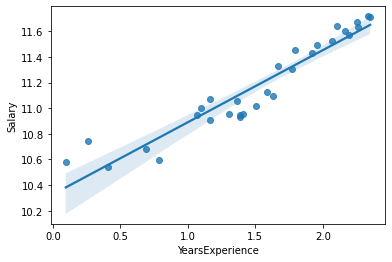

In [49]:
sns.regplot(x='YearsExperience',y='Salary',data=salary_log)

# reciprocal square

In [ ]:
salary_reci=salary**-2

In [ ]:
model11_reci=smf.ols("salary_reci['YearsExperience']~salary['Salary']",data=salary_reci).fit()

In [ ]:
model11_reci.params

Intercept           0.427758
salary['Salary']   -0.000004
dtype: float64

In [ ]:
model11_reci.pvalues

Intercept           0.000019
salary['Salary']    0.000426
dtype: float64

In [ ]:
model11_reci.rsquared

0.3630647680919368

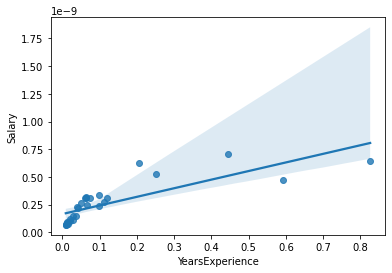

In [50]:
sns.regplot(x='YearsExperience',y='Salary',data=salary_reci)

# square

In [ ]:
salary_square=np.square(salary)

In [ ]:
model11_sq=smf.ols("salary_square['YearsExperience']~salary_square['Salary']",data=salary_square).fit()

In [ ]:
model11_sq.pvalues

Intercept                  2.377703e-05
salary_square['Salary']    2.824566e-20
dtype: float64

In [ ]:
model11_sq.rsquared

0.9540880842110778

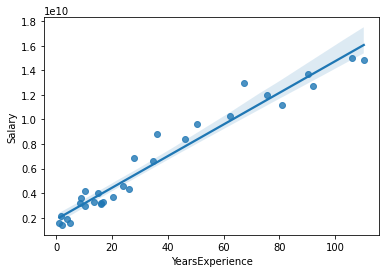

In [51]:
sns.regplot(x='YearsExperience',y='Salary',data=salary_square)

# reciprocal

In [ ]:
salary_inv=salary*-1

In [ ]:
model11_inv=smf.ols("salary_inv['YearsExperience']~salary_inv['Salary']",data=salary_inv).fit()

In [ ]:
model11_inv.pvalues

Intercept               6.300123e-08
salary_inv['Salary']    1.143068e-20
dtype: float64

In [ ]:
model11_inv.rsquared

0.9569566641435086

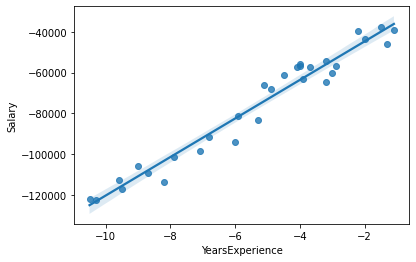

In [52]:
sns.regplot(x='YearsExperience',y='Salary',data=salary_inv)